# **Assignment 4. Overfitting Problem**

使用作業指定的NN模型，在不改變模型架構與activation function之下解決model overfitting的問題，提高validation and testing accuracy。


In [25]:
# Import 
import os, torch
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.datasets import cifar10

In [26]:
# Set Direction
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/data/tmp/Introduction-to-Machine-Learning/homework/HW4')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


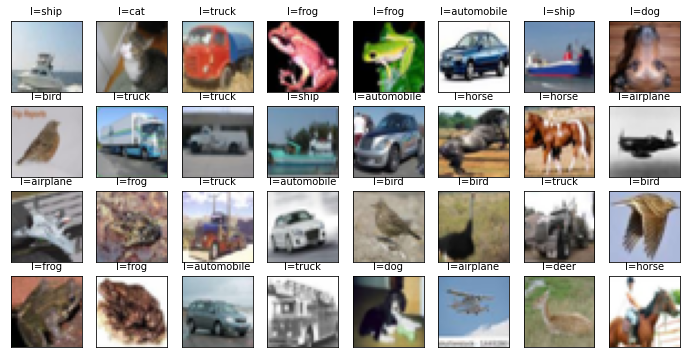

In [27]:
# Load Data and Normalization
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_multiimages(images, labels, prediction, idx, num=32):
    fig, ax = plt.subplots(4, 8, figsize=(12, 6))
    if num > 32:
        num = 32
    for i in range(0, num):
        ax = plt.subplot(4, 8, 1+i)
        ax.imshow(images[idx])
        title = "l=" + class_names[int(labels[idx])]
        if len(prediction) > 0:
            title = "l={},p={}".format(
                class_names[int(labels[idx])], class_names[prediction[idx]])
        else:
            title = "l={}".format(class_names[int(labels[idx])])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

plot_multiimages(x_train_image, y_train_label, [], 100, 32)

x_train = x_train_image.reshape(len(x_train_image), 32, 32, 3).astype('float32')
x_test = x_test_image.reshape(len(x_test_image), 32, 32, 3).astype('float32')
x_train_norm = x_train / 255
x_test_norm = x_test / 255
y_TrainOneHot = utils.to_categorical(y_train_label)
y_TestOneHot = utils.to_categorical(y_test_label)

In [28]:
# Build a Convolution Neural Network
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(BatchNormalization()) 
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization()) 

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization()) 

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization()) 

model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connection Layer
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

# Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_36 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_37 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_38 (Bat  (None, 32, 32, 32)      

In [29]:
# Train Convolution Neural Network Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=25, batch_size=32, verbose=1)

# Save Model
torch.save(model, './model.pt')

Epoch 1/25
1250/1250 [==============================] - 13s 9ms/step - loss: 1.6093 - accuracy: 0.4226 - val_loss: 1.3441 - val_accuracy: 0.5133
Epoch 2/25
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0813 - accuracy: 0.6268 - val_loss: 1.0722 - val_accuracy: 0.6390
Epoch 3/25
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8693 - accuracy: 0.7035 - val_loss: 0.8233 - val_accuracy: 0.7221
Epoch 4/25
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7441 - accuracy: 0.7495 - val_loss: 0.7716 - val_accuracy: 0.7399
Epoch 5/25
1250/1250 [==============================] - 12s 9ms/step - loss: 0.6430 - accuracy: 0.7849 - val_loss: 0.7213 - val_accuracy: 0.7635
Epoch 6/25
1250/1250 [==============================] - 11s 9ms/step - loss: 0.5566 - accuracy: 0.8126 - val_loss: 0.6309 - val_accuracy: 0.7826
Epoch 7/25
1250/1250 [==============================] - 11s 9ms/step - loss: 0.4939 - accuracy: 0.8351 - val_loss: 0.6606 - val_ac

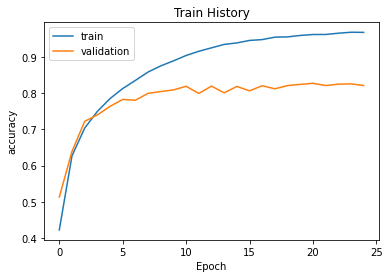

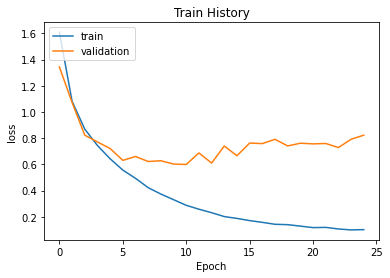

313/313 [==============================] - 2s 5ms/step - loss: 0.8577 - accuracy: 0.8116

	[Info] Accuracy of testing data = 81.2%


In [30]:
# Show Train History
def show_train_history(train_history, train, validation, filename):  
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')  
    plt.xlabel('Epoch') 
    plt.ylabel(train)  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.savefig(filename)
    plt.show()
    
show_train_history(train_history, 'accuracy', 'val_accuracy', './picture/train_history_accuracy.png')
show_train_history(train_history, 'loss', 'val_loss', './picture/train_history_loss.png')

scores = model.evaluate(x_test_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))